In [2]:
"""

Objectives:

1. Define state structure with a list of HumanMessage objects.
2. Initialize a Claude model using LangChain.
3. Sending and handling different types of messages.
4. Building and compiling the graph of the Agent.

Main Goal: How to integrate LLMs in our graph.

"""

'\n\nObjectives:\n\n1. Define state structure with a list of HumanMessage objects.\n2. Initialize a Claude model using LangChain.\n3. Sending and handling different types of messages.\n4. Building and compiling the graph of the Agent.\n\nMain Goal: How to integrate LLMs in our graph.\n\n'

In [ ]:
!pip install langchain_anthropic

In [4]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_anthropic import ChatAnthropic
from langgraph.graph import StateGraph, START, END

In [5]:
from getpass import getpass
import os

# Prompt for Claude API key (input is hidden)
claude_api_key = getpass("Enter your Claude API Key: ")
os.environ["ANTHROPIC_API_KEY"] = claude_api_key


Enter your Claude API Key: ··········


In [16]:
model = ChatAnthropic(
    model="claude-sonnet-4-20250514",
    anthropic_api_key=claude_api_key  # explicitly pass the key
)

In [17]:
class AgentState(TypedDict):
  messages: List[HumanMessage]

In [18]:
def process(state: AgentState) -> AgentState:
  """ Provide response to user input """
  ai_response = model.invoke(state['messages'])
  print(f'\n AI response: {ai_response.content}')
  return state

In [19]:
graph = StateGraph(AgentState)

graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)

agent = graph.compile()

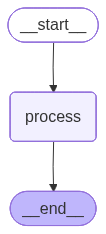

In [20]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [21]:
user_input = input("Enter: ")
while user_input != "exit":
  agent.invoke({"messages": [HumanMessage(content = user_input)]})
  user_input = input("Enter: ")

Enter: Hi

 AI response: Hello! How are you doing today? Is there anything I can help you with?
Enter: What can you do?

 AI response: I can help with a wide variety of tasks! Here are some key things I can do:

**Writing & Communication**
- Help with writing, editing, and proofreading
- Brainstorm ideas and provide feedback
- Translate between many languages
- Summarize long texts or documents

**Analysis & Research**
- Answer questions on diverse topics
- Analyze data, documents, or arguments
- Help with research and fact-checking
- Break down complex problems

**Creative Tasks**
- Write stories, poems, or scripts
- Help with creative brainstorming
- Generate ideas for projects
- Assist with artistic concepts

**Technical Help**
- Code in various programming languages
- Debug and explain code
- Help with math and calculations
- Explain technical concepts

**Learning & Education**
- Explain topics at different complexity levels
- Create study materials or lesson plans
- Help with home